In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

PART 1: 

HOW TO CLEAN DATA WITH PYTHON
Cleaning US Census Data
You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple csv files. They didn’t use pandas, they would just look through these csv files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into pandas and into reasonable shape so that you can make these histograms?



Inspect the Data!

# 1.
The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

Open some of the census csv files in the navigator. How are they named? What kind of information do they hold? Will they help us make this graph?

In [134]:
csv = pd.read_csv('states0.csv')
csv

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F


# 2.
It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them?

Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.

In [ ]:
data = glob('states*')
us_census = pd.concat((pd.read_csv(file) for file in data), ignore_index=True)
us_census.head()

# 3.
Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [ ]:
us_census.columns

In [ ]:
us_census.dtypes

# 4.
Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

Start to make a plan for how to convert these columns into the right types for manipulation.

Regex to the Rescue

In [ ]:
us_census.head()

# 5.
Use regex to turn the Income column into a format that is ready for conversion into a numerical type.

In [ ]:
us_census['Income'] = us_census['Income'].str.replace('$', '', regex = True)
us_census['Income']= pd.to_numeric(us_census['Income'])
us_census.dtypes

# 6.
Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column.

Split the column into those two new columns using str.split and separating out those results.


In [ ]:
us_census[['Men', 'Women']] = us_census['GenderPop'].str.split('_', expand = True)
us_census.head()

# 7.
Convert both of the columns into numerical datatypes.

There is still an M or an F character in each entry! We should remove those before we convert.

In [ ]:
us_census['Men']= us_census['Men'].str.replace('M', '')
us_census['Women'] = us_census['Women'].str.replace('F','')

In [ ]:
us_census['Men'] = pd.to_numeric(us_census['Men'])
us_census['Women'] = pd.to_numeric(us_census['Women'])
us_census.dtypes

# 8.
Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!

Use matplotlib to make a scatterplot!

plt.scatter(the_women_column, the_income_column) 
Remember to call plt.show() to see the graph!















In [ ]:
plt.scatter(us_census["Women"], us_census["Income"])
plt.show()

# 9.
Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.

We can fill in those nans by using pandas’ .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

Print out the Women column after filling the nan values to see if it worked!

In [ ]:
us_census['Women']=us_census['Women'].fillna(us_census['TotalPop'] - us_census['Men']).astype(int)
us_census['Women']

# 10.
We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.

In [ ]:
us_census.duplicated()

# 11.
Drop those duplicates using the .drop_duplicates() function.

In [ ]:
us_census.drop_duplicates()

# 12.
Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

Histograms of Races

In [ ]:
plt.scatter(us_census['Women'], us_census['Income'])

# 13.
Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

In [102]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')

# 14.
Try to make a histogram for each one!

You will have to get the columns into numerical format, and those percentage signs will have to go.

Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.

Get Creative

In [ ]:
def signs(name):
    us_census[name]= us_census[name].str.replace('%','')
signs('Hispanic')
signs('White')
signs('Black')
signs('Native')
signs('Asian')

In [ ]:
us_census.isnull().sum()

In [ ]:
def fill(name1):
    us_census[name1] = us_census[name1].fillna(us_census[name1].mean())
fill('Pacific')

In [101]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
dtype: bool

# 15.
Phew. You’ve definitely impressed your boss on your first day of work.

But is there a way you really convey the power of pandas and Python over the drudgery of csv and Excel?

Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you’ve been searching for.

(array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

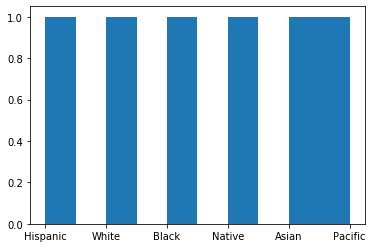

In [107]:
x = ['Hispanic', 'White', 'Black','Native', 'Asian', 'Pacific']
plt.hist(x)

# PART 2:

LEARN DATA ANALYSIS WITH PANDAS
Petal Power Inventory
You’re the lead data analyst for a chain of gardening stores called Petal Power. Help them analyze their inventory!


Answer Customer Emails

# 1.
Data for all of the locations of Petal Power is in the file inventory.csv. Load the data into a DataFrame called inventory.

In [112]:
inventory= pd.read_csv('inventory.csv')

# 2.
Inspect the first 10 rows of inventory.

In [113]:
inventory.head(10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


# 3.
The first 10 rows represent data from your Staten Island location. Select these rows and save them to staten_island.

In [120]:
staten_island = inventory.iloc[:10,:]
staten_island

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


# 4.
A customer just emailed you asking what products are sold at your Staten Island location. Select the column product_description from staten_island and save it to the variable product_request.

In [123]:
product_request = staten_island['product_description']
product_request

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

# 5.
Another customer emails to ask what types of seeds are sold at the Brooklyn location.

Select all rows where location is equal to Brooklyn and product_type is equal to seeds and save them to the variable seed_request



Inventory

In [125]:
seed_request = inventory.loc[(inventory['location']=='Brooklyn') & (inventory['product_type']=='seeds') ]
seed_request

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


# 6.
Add a column to inventory called in_stock which is True if quantity is greater than 0 and False if quantity equals 0.



In [127]:
stck = lambda x:'True' if x>0 else 'False'
inventory['in_stock']= inventory.quantity.apply(stck)
inventory.head()

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False


# 7.
Petal Power wants to know how valuable their current inventory is.

Create a column called total_value that is equal to price multiplied by quantity.


In [128]:
inventory['total_value'] = inventory['price']* inventory['quantity']
inventory.head()

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00


# 8.
The Marketing department wants a complete description of each product for their catalog.

The following lambda function combines product_type and product_description into a single string:

combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)
Paste this function into script.py.



In [130]:
combine_lambda = lambda row:'{} - {}'.format(row.product_type, row.product_description)

# 9.
Using combine_lambda, create a new column in inventory called full_description that has the complete description of each product.


In [131]:
inventory['full_description'] = combine_lambda(inventory)

In [132]:
inventory.head(10)

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,0 seeds\n1 seeds\n2 ...
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,0 seeds\n1 seeds\n2 ...
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,0 seeds\n1 seeds\n2 ...
3,Staten Island,garden tools,rake,4,13.99,True,55.96,0 seeds\n1 seeds\n2 ...
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,0 seeds\n1 seeds\n2 ...
5,Staten Island,garden tools,spade,93,19.99,True,1859.07,0 seeds\n1 seeds\n2 ...
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26,0 seeds\n1 seeds\n2 ...
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92,0 seeds\n1 seeds\n2 ...
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00,0 seeds\n1 seeds\n2 ...
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47,0 seeds\n1 seeds\n2 ...
